In [19]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# speed-up using multithreads
cv2.setUseOptimized(True)
cv2.setNumThreads(4)

def selective_search(image_path, num_rects):
    ss = cv2.ximgproc.segmentation.createSelectiveSearchSegmentation()

    image = cv2.imread(image_path)
    ss.setBaseImage(image)
    
    #ss.switchToSelectiveSearchFast()
    ss.switchToSelectiveSearchQuality()
    rects = ss.process()

    return rects[:num_rects]

def show_selective_search(image, rects):
    imOut = image.copy()

    # itereate over all the region proposals
    for _, rect in enumerate(rects):
        # draw rectangle for region proposal
        x, y, w, h = rect
        color = list(np.random.random(size=3) * 256)
        cv2.rectangle(imOut, (x, y), (x+w, y+h), color, 2, cv2.LINE_AA)

    plt.imshow(imOut[...,::-1])

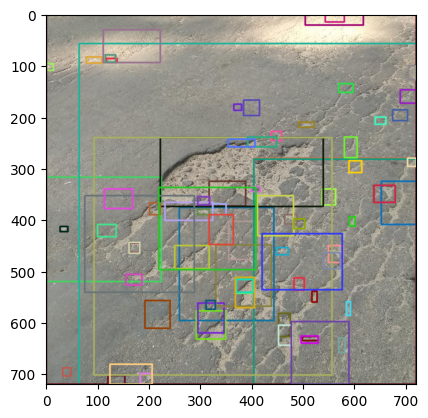

In [20]:
image_path = 'Potholes/annotated-images/img-1.jpg'
rects = selective_search(image_path, 80)
show_selective_search(cv2.imread(image_path), rects)